# **Machine Learning para Negócios**
MBA em IA, Data Science e Big Data para Negócios

IBMEC 2025.1

#**Grupo:**
  Leonardo Pazo - Matrícula: 2025.03.52088-7

  Rafaela Filardi - Matrícula: 2025.03.52718-1

  Silvio Mota - Matricula: 2025.03.52728-8

# **Instalação e Importação dos Pacotes**

In [ ]:
!pip install yfinance
!pip install plotly
!pip install tensorflow

In [ ]:
import pandas as pd #padrão para trabalhar com dataframe
import numpy as np #mexer com vetores, matrizes, estatística
import yfinance as yf #Instalando e importando a API no código - os dados q chamar do Yfinance é na verdade uma busca de dados no yahoo finanças
from datetime import datetime, timedelta
import matplotlib.pyplot as plt #biblioteca padrão para gráficos
import seaborn as sns #outra biblio para gráficos


# **Baixar Dados Reais**

In [ ]:
codigos_acoes = ['GGBR3', 'ABCB4', 'MGLU3']
data_inicio = '2020-01-01'  #Dados desde 2020
data_fim = datetime.now().strftime('%Y-%m-%d')
dados_acoes = {}

print("Iniciando download dos dados...\n")

for codigo in codigos_acoes:
    try:
        dados = yf.download(f'{codigo}.SA', start=data_inicio, end=data_fim, progress=False)
        if not dados.empty:
            dados_acoes[codigo] = dados
            print(f" {codigo} - Dados baixados (de {dados.index[0].date()} a {dados.index[-1].date()})\n")
        else:
            print(f" {codigo} - Nenhum dado disponível\n")
    except Exception as e:
        print(f" {codigo} - Erro: {str(e)}\n")

print("Download concluído!")

Iniciando download dos dados...

 GGBR3 - Dados baixados (de 2020-01-02 a 2025-04-14)

 ABCB4 - Dados baixados (de 2020-01-02 a 2025-04-14)

 MGLU3 - Dados baixados (de 2020-01-02 a 2025-04-14)

Download concluído!


In [ ]:
dados_acoes['MGLU3']

Price,Close,High,Low,Open,Volume
Ticker,MGLU3.SA,MGLU3.SA,MGLU3.SA,MGLU3.SA,MGLU3.SA
Date,,,,,
2020-01-02,115.015053,115.015053,111.237956,112.613565,3164766
2020-01-03,113.989182,115.015060,112.613572,113.079878,2858647
2020-01-06,114.082443,114.968430,111.447799,112.846725,2925106
2020-01-07,113.756020,114.711948,113.079866,114.105751,2867329
2020-01-08,117.253342,117.393233,113.079873,113.359663,4277365
...,...,...,...,...,...
2025-04-08,8.780000,10.420000,8.730000,10.390000,53611700
2025-04-09,9.770000,9.870000,8.480000,8.660000,53457200


# **Visualização dos Dados**

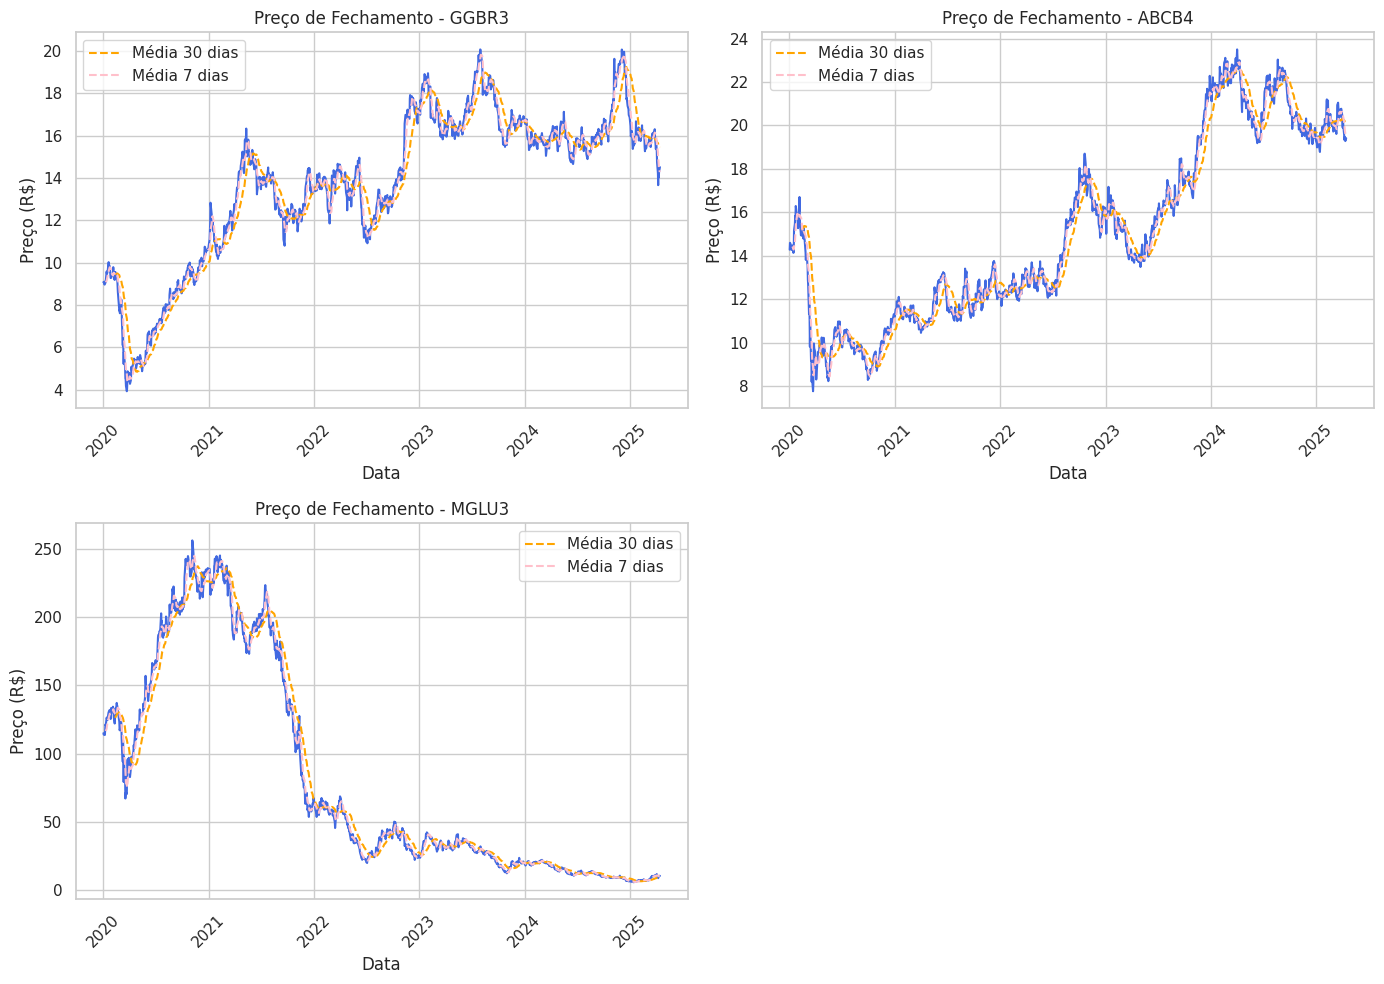

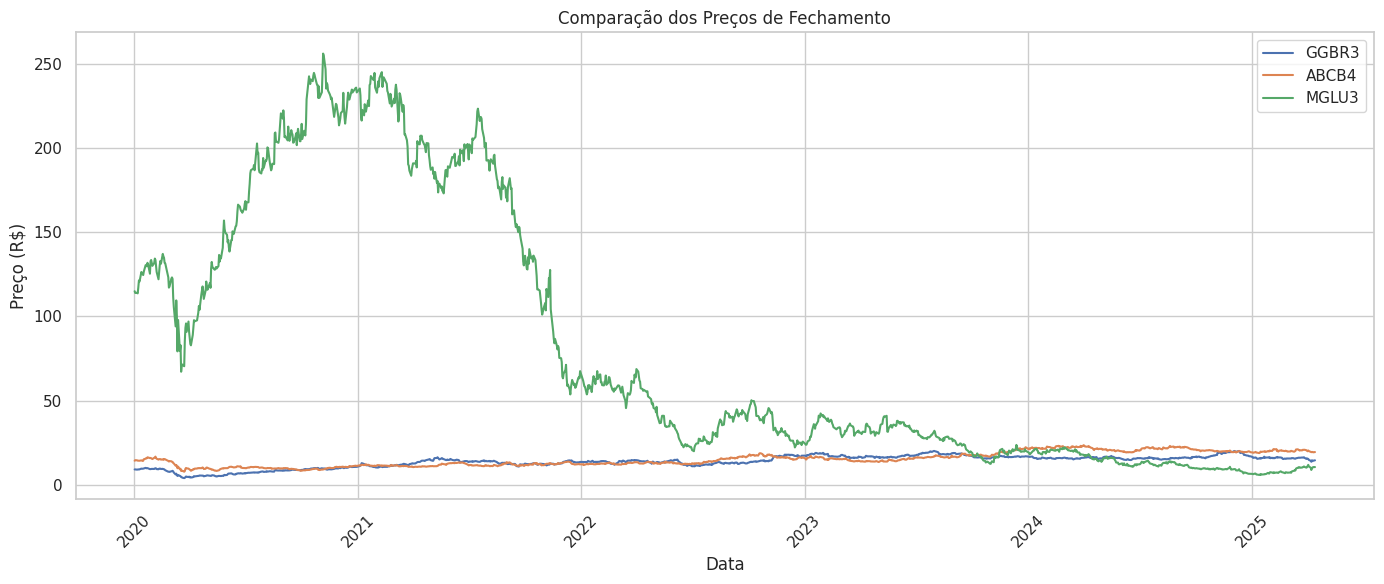

In [ ]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))


# Criando gráficos individuais para cada ativo
for i, (codigo, dados) in enumerate(dados_acoes.items(), 1):
    # Prepara os dados para plotagem - garantindo que sejam 1D (1 dia)
    plot_data = pd.DataFrame({
        'Data': dados.index.to_numpy(),  # Converte para array numpy
        'Close': dados['Close'].to_numpy().flatten(),  # Garante 1D - pegou só os dados do close. Esse "to numpy" é transformar para vetor e flatten é linearizar. Antes ele estava como dataframe
        'MA30': dados['Close'].rolling(window=30).mean().to_numpy().flatten(),
        'MA7': dados['Close'].rolling(window=7).mean().to_numpy().flatten()
    })



    # Gráfico de linha do preço de fechamento
    plt.subplot(2, 2, i)
    sns.lineplot(data=plot_data, x='Data', y='Close', color='royalblue')
    plt.title(f'Preço de Fechamento - {codigo}')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.xticks(rotation=45)

    # Adiciona média móvel de 30 dias (linha amarela tracejada no gráfico) - forma de suavizar os ruídos da série temporal e dar mais informação mesmo
    #trabalhar com a média de 30 dias em um dado diário está suavizando muito mais. Está vendo média de 30 em 30 dias.
    sns.lineplot(data=plot_data, x='Data', y='MA30', color='orange', linestyle='--', label='Média 30 dias')
    plt.legend()

    # Adiciona média móvel de 7 dias (linha rosa tracejada no gráfico)
    sns.lineplot(data=plot_data, x='Data', y='MA7', color='pink', linestyle='--', label='Média 7 dias')
    plt.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Gráfico combinado para comparação
plt.figure(figsize=(14, 6))
comparison_data = pd.DataFrame()

for codigo, dados in dados_acoes.items():
    temp_df = pd.DataFrame({
        'Data': dados.index.to_numpy(),
        'Close': dados['Close'].to_numpy().flatten(),
        'Ativo': codigo
    })
    comparison_data = pd.concat([comparison_data, temp_df])

sns.lineplot(data=comparison_data, x='Data', y='Close', hue='Ativo')
plt.title('Comparação dos Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Matriz de Correlação**

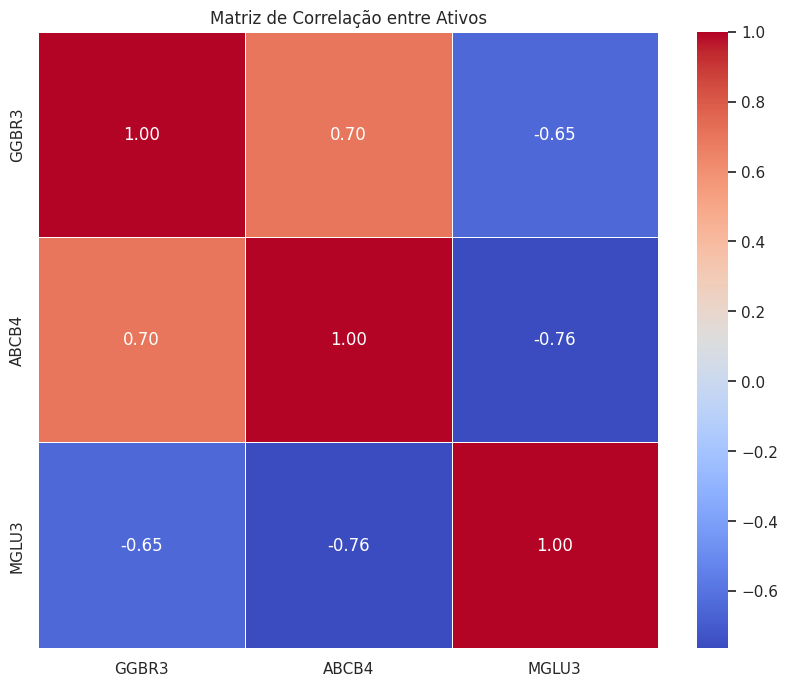

In [ ]:
#criando um Data Frame para armazenar os preços de fechamento
precos_fechamento = pd.DataFrame()
for codigo, dados in dados_acoes.items():
    precos_fechamento[codigo] = dados['Close']

#Matriz de Correlação
correlation_matrix = precos_fechamento.corr()

#Gráfico de Mapa de Calor
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

#Plotando a Matriz de Correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Ativos')
plt.show()

# **Cálculo dos Retornos**

Antes eu estava vendo como está o comportamento da ação mas agora quero saber qual vai ser meu retorno se investir nessa ação


Calculando retornos...


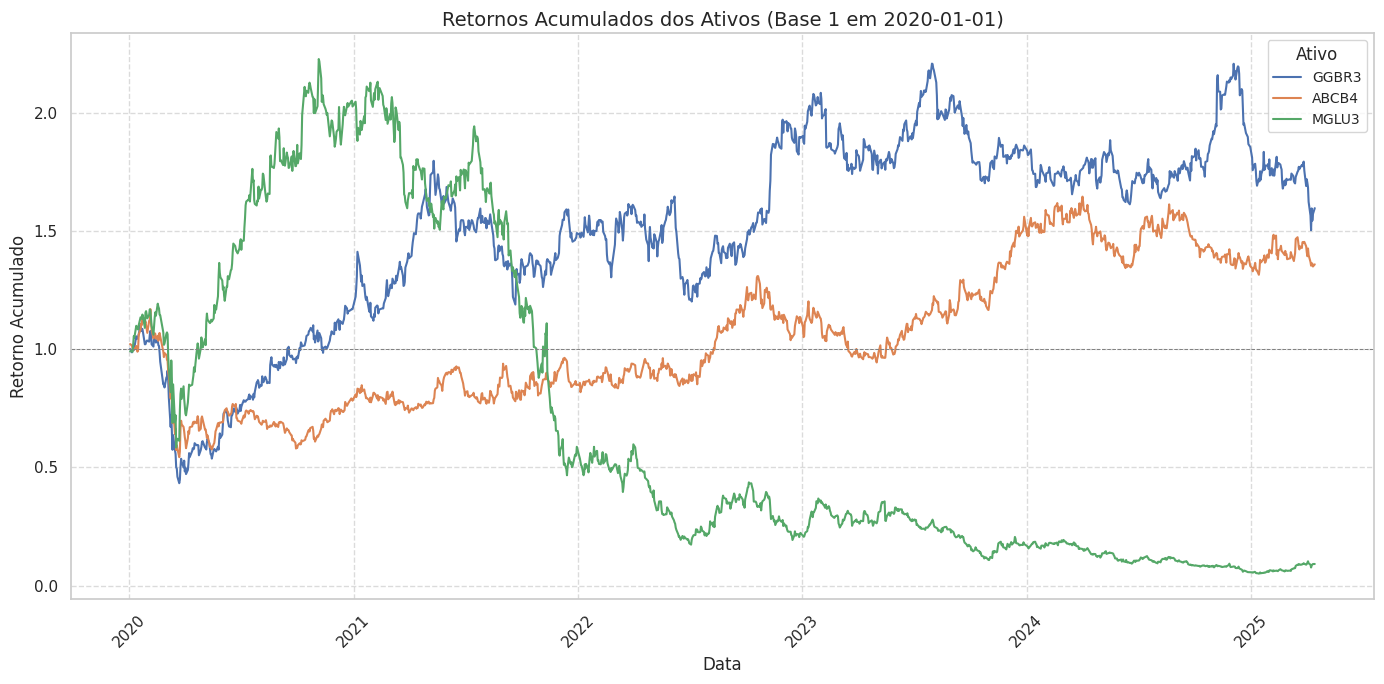

In [ ]:
# Cálculo dos retornos diários e acumulados
print("\nCalculando retornos...")
retornos_lista = []
for codigo, dados in dados_acoes.items():
    # Verifica e remove duplicatas
    dados = dados[~dados.index.duplicated(keep='first')]

    # Calcula retornos
    dados['Retorno_Diario'] = dados['Close'].pct_change()
    dados['Retorno_Acumulado'] = (1 + dados['Retorno_Diario']).cumprod()  #cumprod é um acumulador, vai somando produtos

    # Prepara dados para o DataFrame
    temp_df = pd.DataFrame({
        'Data': dados.index,
        'Retorno_Acumulado': dados['Retorno_Acumulado'],
        'Ativo': codigo
    })
    retornos_lista.append(temp_df)

# Concatena todos os dados de retorno
retornos = pd.concat(retornos_lista).reset_index(drop=True)

# Gráfico comparativo dos retornos acumulados
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Verifica se há dados para plotar
if not retornos.empty:
    sns.lineplot(data=retornos, x='Data', y='Retorno_Acumulado', hue='Ativo', errorbar=None)

    plt.title('Retornos Acumulados dos Ativos (Base 1 em 2020-01-01)', fontsize=14)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Retorno Acumulado', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Ativo', title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adiciona linha de base em 1
    plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum dado válido para plotar o gráfico de retornos.")


# **Histograma do Ativo com Melhor retorno**

Revela a persistência do mercado, como enxerga as coisas

Iniciando download dos dados...

 GGBR3 - Retorno total: 59.73%
 ABCB4 - Retorno total: 35.94%
 MGLU3 - Retorno total: -90.88%

Download e cálculo de retornos concluídos!

O ativo com maior retorno foi GGBR3 com 59.73% no período


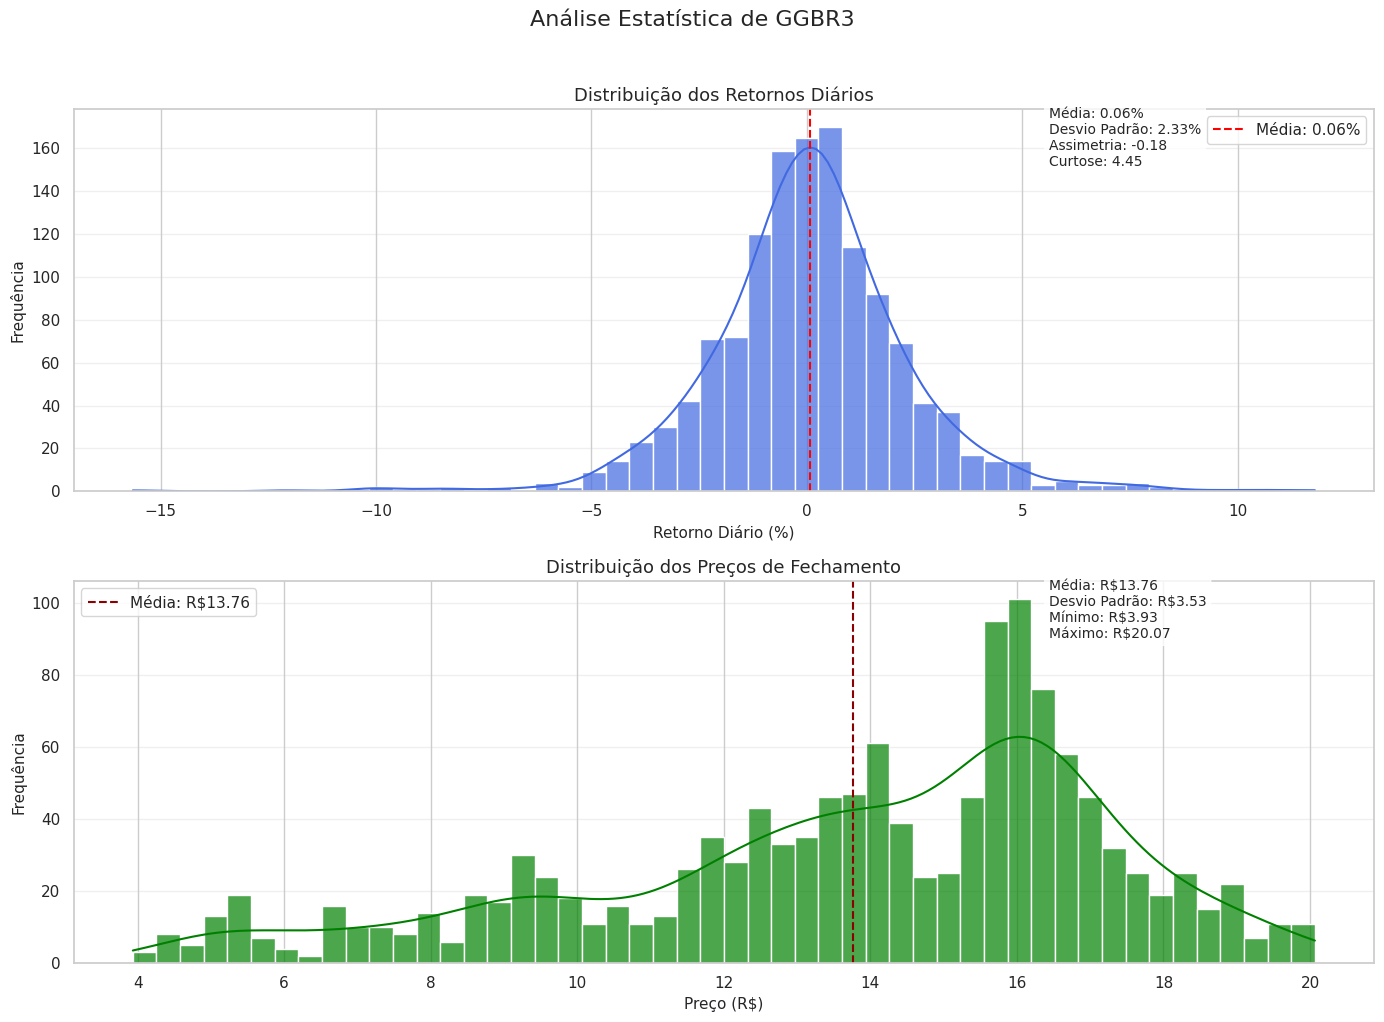


Estatísticas Detalhadas para GGBR3:
                    Média  Mediana Desvio Padrão    Máximo     Mínimo
Retornos Diários  0.0630%  0.0745%       2.3343%  11.7871%  -15.6429%
Preços            R$13.76  R$14.36        R$3.53   R$20.07     R$3.93


In [ ]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuração inicial
codigos_acoes = ['GGBR3', 'ABCB4', 'MGLU3']
data_inicio = '2020-01-01'
data_fim = datetime.now().strftime('%Y-%m-%d')

print("Iniciando download dos dados...\n")

# Baixa e processa os dados
dados_acoes = {}
retornos_totais = {}

for codigo in codigos_acoes:
    try:
        dados = yf.download(f'{codigo}.SA', start=data_inicio, end=data_fim, progress=False)
        if not dados.empty:
            # Remove duplicatas e garante dados limpos
            dados = dados[~dados.index.duplicated(keep='first')].copy()

            # Calcula retornos
            dados['Retorno_Diario'] = dados['Close'].pct_change()
            dados['Retorno_Acumulado'] = (1 + dados['Retorno_Diario']).cumprod()

            # Armazena os dados
            dados_acoes[codigo] = dados

            # Calcula o retorno total no período
            retorno_total = float(dados['Retorno_Acumulado'].iloc[-1] - 1)
            retornos_totais[codigo] = retorno_total

            print(f" {codigo} - Retorno total: {retorno_total:.2%}")
        else:
            print(f" {codigo} - Nenhum dado disponível")
    except Exception as e:
        print(f" {codigo} - Erro no processamento: {str(e)}")

print("\nDownload e cálculo de retornos concluídos!")

# Identifica o ativo com maior retorno
if retornos_totais:
    melhor_ativo = max(retornos_totais.items(), key=lambda x: x[1])[0]
    melhor_retorno = retornos_totais[melhor_ativo]
    print(f"\nO ativo com maior retorno foi {melhor_ativo} com {melhor_retorno:.2%} no período")

    # Garante que os dados estão no formato correto
    dados_melhor = dados_acoes[melhor_ativo]

    # Converte explicitamente para arrays 1D
    precos = dados_melhor['Close'].to_numpy().flatten()
    retornos_diarios = dados_melhor['Retorno_Diario'].dropna().to_numpy().flatten()

    # Verifica se há dados suficientes
    if len(precos) == 0 or len(retornos_diarios) == 0:
        print("\nErro: Dados insuficientes para gerar gráficos")
    else:
        # Configuração da figura
        plt.figure(figsize=(14, 10))
        sns.set_style("whitegrid")
        plt.suptitle(f'Análise Estatística de {melhor_ativo}', fontsize=16, y=1.02)

        # Primeiro subplot: Histograma dos Retornos Diários
        plt.subplot(2, 1, 1)
        sns.histplot(
            x=retornos_diarios * 100,  # Convertendo para porcentagem     #usando os retornos diários e multiplicou por 100 para ficar %
            bins=50, #são as caixinhas/categorias, no caso são as faixas de preço
            kde=True,
            color='royalblue',
            edgecolor='white',
            alpha=0.7
        )

        # Linha vertical na média
        media_ret = np.mean(retornos_diarios) * 100
        plt.axvline(media_ret, color='red', linestyle='--', linewidth=1.5,
                    label=f'Média: {media_ret:.2f}%')

        plt.title('Distribuição dos Retornos Diários', fontsize=13)
        plt.xlabel('Retorno Diário (%)', fontsize=11)
        plt.ylabel('Frequência', fontsize=11)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Adiciona informações estatísticas
        stats_text = f"""Média: {media_ret:.2f}%
Desvio Padrão: {np.std(retornos_diarios) * 100:.2f}%
Assimetria: {pd.Series(retornos_diarios).skew():.2f}
Curtose: {pd.Series(retornos_diarios).kurtosis():.2f}"""
        plt.annotate(
            stats_text,
            xy=(0.75, 0.85),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10
        )

        # Segundo subplot: Histograma dos Preços de Fechamento
        plt.subplot(2, 1, 2)
        sns.histplot(
            x=precos,
            bins=50,
            kde=True,
            color='green',
            edgecolor='white',
            alpha=0.7
        )

        # Linha vertical na média
        media_preco = np.mean(precos)
        plt.axvline(media_preco, color='darkred', linestyle='--', linewidth=1.5,
                    label=f'Média: R${media_preco:.2f}')

        plt.title('Distribuição dos Preços de Fechamento', fontsize=13)
        plt.xlabel('Preço (R$)', fontsize=11)
        plt.ylabel('Frequência', fontsize=11)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Adiciona informações estatísticas
        stats_text = f"""Média: R${media_preco:.2f}
Desvio Padrão: R${np.std(precos):.2f}
Mínimo: R${np.min(precos):.2f}
Máximo: R${np.max(precos):.2f}"""
        plt.annotate(
            stats_text,
            xy=(0.75, 0.85),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10
        )

        plt.tight_layout()
        plt.show()

        # Mostra estatísticas adicionais no console
        print(f"\nEstatísticas Detalhadas para {melhor_ativo}:")
        stats_df = pd.DataFrame({
            'Retornos Diários': {
                'Média': f"{np.mean(retornos_diarios) * 100:.4f}%",
                'Mediana': f"{np.median(retornos_diarios) * 100:.4f}%",
                'Desvio Padrão': f"{np.std(retornos_diarios) * 100:.4f}%",
                'Máximo': f"{np.max(retornos_diarios) * 100:.4f}%",
                'Mínimo': f"{np.min(retornos_diarios) * 100:.4f}%"
            },
            'Preços': {
                'Média': f"R${np.mean(precos):.2f}",
                'Mediana': f"R${np.median(precos):.2f}",
                'Desvio Padrão': f"R${np.std(precos):.2f}",
                'Máximo': f"R${np.max(precos):.2f}",
                'Mínimo': f"R${np.min(precos):.2f}"
            }
        }).T
        print(stats_df)

else:
    print("\nNenhum dado válido para análise.")

# **Modelo de Regressão Linear**

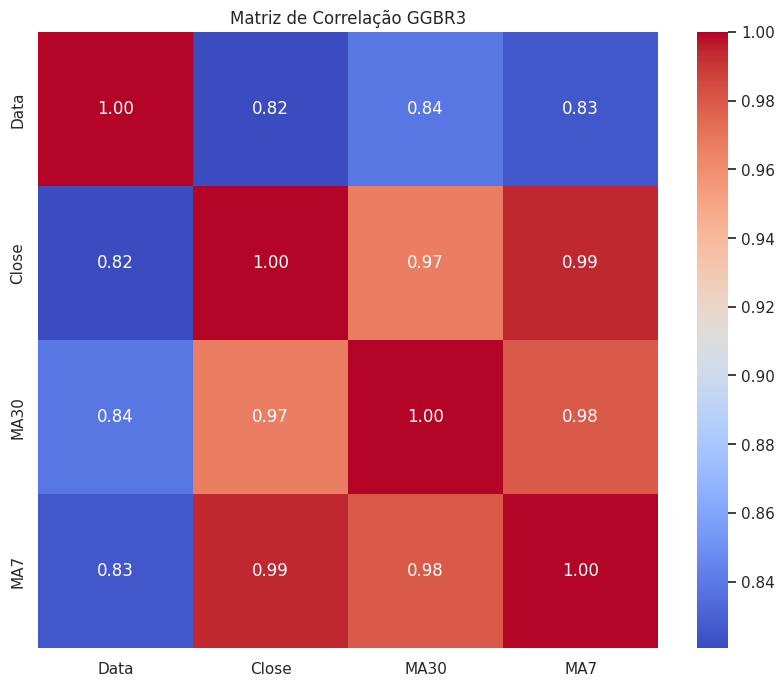

In [ ]:
## Matriz de Correlação do Ativo GGBR3 para definir qual variável explicativa vamos utilizar na regressão linear


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Filtrando somente GGBR3
dados_ggbr3 = dados_acoes['GGBR3']


# Prepara os dados para plotagem - garantindo que sejam 1D (1 dia)
plot_data = pd.DataFrame({
      'Data': dados_ggbr3.index.to_numpy(),
      'Close': dados_ggbr3['Close'].to_numpy().flatten(),
      'MA30': dados_ggbr3['Close'].rolling(window=30).mean().to_numpy().flatten(),
      'MA7': dados_ggbr3['Close'].rolling(window=7).mean().to_numpy().flatten()
    })


correlation_matrix = plot_data.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação GGBR3')
plt.show()

In [ ]:
df = dados_acoes['GGBR3']['Close']

# Mostra as primeiras linhas
print(df.head())


##Estamos escolhendo oq vamos usar para treinar nossa ML - escolhi treinar a ML para GGBR pq tava com maior retorno e tinha a previsibilidade.

Ticker      GGBR3.SA
Date                
2020-01-02  9.083901
2020-01-03  9.094207
2020-01-06  8.965391
2020-01-07  9.068442
2020-01-08  9.114817


In [ ]:
df

Ticker,GGBR3.SA
Date,
2020-01-02,9.083901
2020-01-03,9.094207
2020-01-06,8.965391
2020-01-07,9.068442
2020-01-08,9.114817
...,...
2025-04-08,13.660000
2025-04-09,14.500000
2025-04-10,14.030000


[*********************100%***********************]  1 of 1 completed



Métricas de Avaliação:
Treino - RMSE: 1.81, MAE: 1.47, r2: 0.75
Teste  - RMSE: 3.90, MAE: 3.66, r2: -9.08

Erro Padrão dos Resíduos: 1.81

Previsões para os próximos 6 meses:
2025-05-14: R$ 21.51 (Intervalo: R$ 17.95 - R$ 25.08)
2025-06-13: R$ 21.72 (Intervalo: R$ 18.16 - R$ 25.29)
2025-07-13: R$ 21.94 (Intervalo: R$ 18.37 - R$ 25.50)
2025-08-12: R$ 22.15 (Intervalo: R$ 18.58 - R$ 25.71)
2025-09-11: R$ 22.36 (Intervalo: R$ 18.79 - R$ 25.93)
2025-10-11: R$ 22.57 (Intervalo: R$ 19.01 - R$ 26.14)


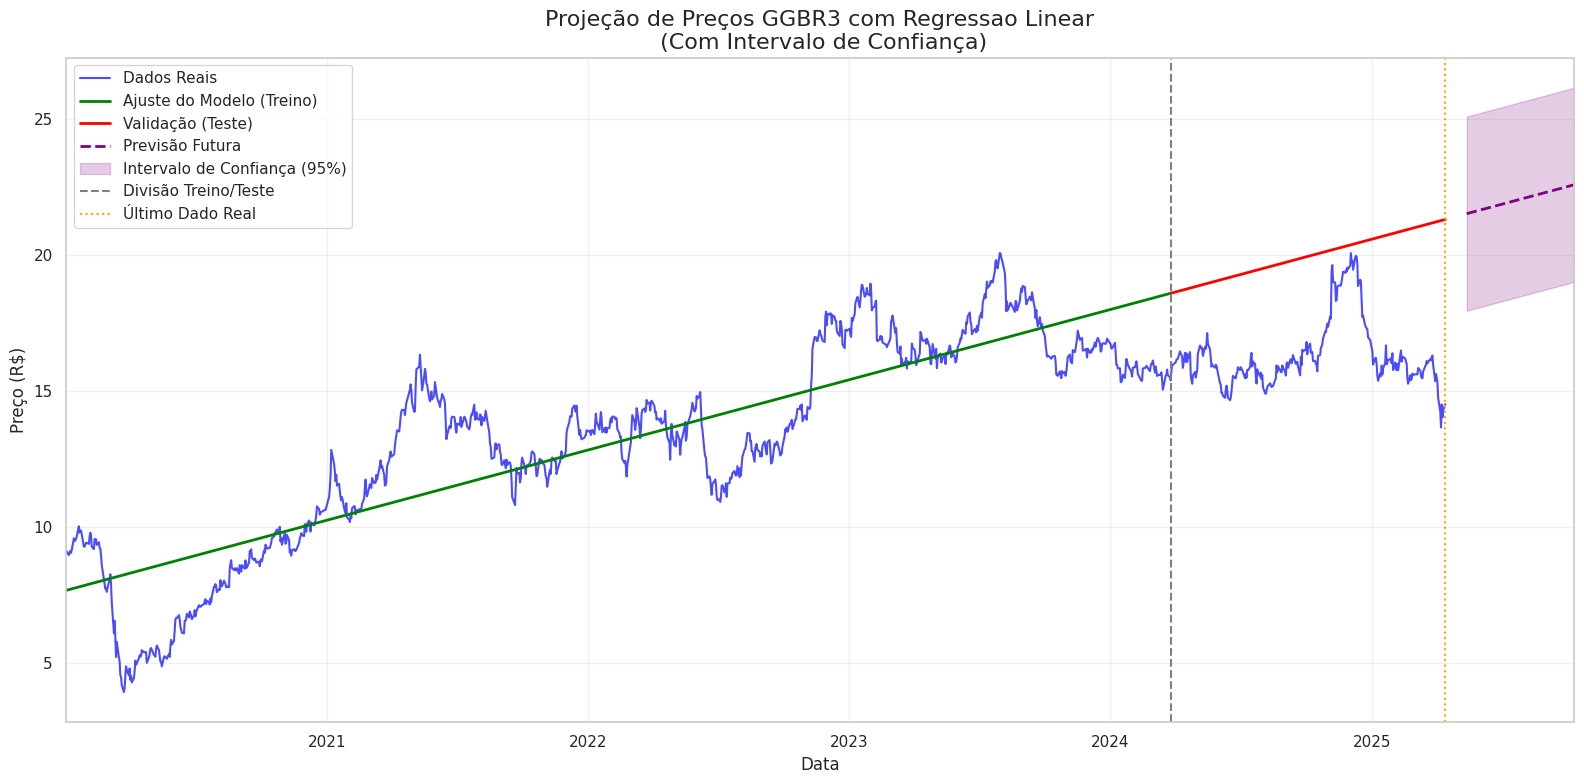


Equação do Modelo: Preço = -5203.50 + 0.007067 * Data


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

# 1. Obter e preparar dados
def get_data():
    codigo = 'GGBR3.SA'
    data_inicio = '2020-01-01'
    data_fim = datetime.now().strftime('%Y-%m-%d')

    df = yf.download(codigo, start=data_inicio, end=data_fim)[['Close']]
    df = df.rename(columns={'Close': 'Preco'}).dropna()   #modifiquei o nome da coluna close para preço e o dropna é oq tira os dados vazios
    df['Data_ordinal'] = df.index.map(lambda x: x.toordinal())    #Função Lambda, muito utilizada em big data. Nesse caso o index é a data - aqui to varrendo todos os indices (todos os dias)
    #toordinal é transformar esse index (essas datas) em uma ordem.
    return df


# 2. Calcular métricas básicas
def calculate_metrics(y_true, y_pred):
    return {
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

# 3. Modelagem e avaliação     - *PARTE MAIS RELEVANTE* - Essa é a Machine Learning
def train_and_evaluate(df):
    # Preparar dados
    X = df[['Data_ordinal']].values #transformar as datas em números, 01/01/2020 é 1 e 02/01/2020 é 2... etc
    y = df['Preco'].values.reshape(-1, 1)    #fazendo uma readequação do preço, escrever em um formato q a regressão linear vai entender


#Divisão treino/teste

# Split temporal - 80% treino, 20% teste - pegando para treino os primeiros 80% dos dados e teste os 20% finais por ser melhor para séries temporais
    split_point = int(len(df.index) * 0.8)


    # Criar as máscaras
    train_mask = np.zeros(len(df), dtype=bool)
    test_mask = np.zeros(len(df), dtype=bool)

    train_mask[:split_point] = True
    test_mask[split_point:] = True

    # Separar dados de treino e teste
    X_train = X[train_mask]
    X_test = X[test_mask]
    y_train = y[train_mask]
    y_test = y[test_mask]

    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)   #Essa linha é o treinamento. forma bem simples de treinamento

    # Previsões
    y_pred_train = model.predict(X_train)  #esse x eu (ML) sei qm é, é o de treino e ai ele me entrega o y_pred_train.
    y_pred_test = model.predict(X_test)    # é o x de teste q me entrega o y de teste.

    # Calcular erros e intervalo de confiança
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)  #np.std - desvio padrão na biblio np(numpy)

    # Avaliação
    metrics_train = calculate_metrics(y_train, y_pred_train)
    metrics_test = calculate_metrics(y_test, y_pred_test)

    return model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error

# 4. Gerar previsões futuras
def generate_future_predictions(model, df, months=6, std_error=None):
    last_date = df.index[-1]
    future_dates = [last_date + timedelta(days=30*i) for i in range(1, months+1)]
    future_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

    future_pred = model.predict(future_ordinal)

    # Calcular intervalos de confiança (95%)
    if std_error is not None:
        n = len(df)
        t_value = stats.t.ppf(0.975, df=n-2)  # Graus de liberdade = n-2
        ci = t_value * std_error * np.sqrt(1 + 1/n + (future_ordinal - df['Data_ordinal'].mean())**2 /
                                         ((df['Data_ordinal'] - df['Data_ordinal'].mean())**2).sum())
        lower_bound = future_pred - ci
        upper_bound = future_pred + ci
    else:
        lower_bound, upper_bound = None, None

    return future_dates, future_pred, lower_bound, upper_bound

# 5. Visualização
def plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_point,
                future_dates=None, future_pred=None, lower_bound=None, upper_bound=None, std_error=None):
    plt.figure(figsize=(16, 8))

    # Dados históricos
    plt.plot(df.index, df['Preco'], label='Dados Reais', color='blue', alpha=0.7)

    # Previsões no período de treino e teste
    plt.plot(df.index[train_mask], y_pred_train, label='Ajuste do Modelo (Treino)', color='green', linewidth=2)
    plt.plot(df.index[test_mask], y_pred_test, label='Validação (Teste)', color='red', linewidth=2)




    # Previsões futuras
    if future_dates is not None:
        plt.plot(future_dates, future_pred, '--', label='Previsão Futura', color='purple', linewidth=2)
        if lower_bound is not None and upper_bound is not None:
            plt.fill_between(future_dates, lower_bound.flatten(), upper_bound.flatten(),
                            color='purple', alpha=0.2, label='Intervalo de Confiança (95%)')

    # Linha de divisão treino/teste
    split_date = df.index[split_point]
    plt.axvline(x=split_date, color='gray', linestyle='--', label='Divisão Treino/Teste')

    # Linha do último dia real
    last_real_date = df.index[-1]
    plt.axvline(x=last_real_date, color='orange', linestyle=':', label='Último Dado Real')

    plt.title('Projeção de Preços GGBR3 com Regressao Linear\n (Com Intervalo de Confiança)', fontsize=16)
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

    # Ajustar limites do eixo x para incluir as previsões futuras
    if future_dates is not None:
        plt.xlim([df.index[0], future_dates[-1]])

    plt.tight_layout()
    plt.show()


# Execução principal
def main():
    df = get_data()   #vai baixar os dados

    if len(df) < 30:  # Mínimo de dados para análise. Regra de negócio estabelecida: preciso de pelo menos 30 dados para trabalhar
        print("Dados insuficientes para análise.")
        return

    model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error = train_and_evaluate(df)  #essa função recebe os dados de entrada e ja sai a ML

    split_point = int(len(df.index) * 0.8)

    # Gerar previsões futuras #Para 6 meses
    future_dates, future_pred, lower_bound, upper_bound = generate_future_predictions(model, df, months=6, std_error=std_error)

    # Exibir métricas
    print("\nMétricas de Avaliação:")
    print(f"Treino - RMSE: {metrics_train['rmse']:.2f}, MAE: {metrics_train['mae']:.2f}, r2: {metrics_train['r2']:.2f}")
    print(f"Teste  - RMSE: {metrics_test['rmse']:.2f}, MAE: {metrics_test['mae']:.2f}, r2: {metrics_test['r2']:.2f}")
    print(f"\nErro Padrão dos Resíduos: {std_error:.2f}")

    # Exibir previsões futuras
    print("\nPrevisões para os próximos 6 meses:")
    for date, pred, lb, ub in zip(future_dates, future_pred, lower_bound, upper_bound):
        print(f"{date.strftime('%Y-%m-%d')}: R$ {pred[0]:.2f} (Intervalo: R$ {lb[0]:.2f} - R$ {ub[0]:.2f})")

    # Gráfico
    plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_point,
                future_dates, future_pred, lower_bound, upper_bound)

    # Equação do modelo
    print(f"\nEquação do Modelo: Preço = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.6f} * Data")

if __name__ == "__main__":
    main()

# **Descrição do Trabalho**

# **Trabalho: Análise de Ativos Financeiros com Regressão Linear e Yahoo Finance**  

## **Objetivo**  
Os alunos deverão selecionar **três ativos financeiros diferentes dos exemplos anteriores (VALE3, PETR4, ITUB4)** e aplicar um modelo de **regressão linear** para prever preços futuros com base em dados históricos do Yahoo Finance. O foco será na **qualidade da seleção dos ativos**, **análise crítica dos resultados** e **discussão sobre os riscos e limitações** do modelo.  

---

## **Etapas do Trabalho**  

### **1. Escolha dos Ativos (Critérios Rígidos)**  
Os alunos devem selecionar três ativos com as seguintes características:  

#### **Critérios Obrigatórios:**  
✅ **Diferentes dos exemplos (não usar VALE3, PETR4, ITUB4).**  
✅ **Liquidez mínima:** Volume médio diário > 1 milhão de ações (para evitar ativos muito voláteis ou pouco negociados).  
✅ **Histórico de dados:** Pelo menos 5 anos de dados diários disponíveis no Yahoo Finance.  
✅ **Setores distintos:** Ex.: Um ativo de commodities, um de varejo e um de tecnologia.  

#### **Sugestões de Ativos (Brasil ou EUA):**  
- **Ações Brasileiras:**  
  - **WEGE3** (Indústria - Weg)  
  - **SUZB3** (Commodities - Suzano)  
  - **RENT3** (Locação de Veículos - Localiza)  
- **Ações Internacionais (em USD):**  
  - **AAPL** (Apple)  
  - **TSLA** (Tesla)  
  - **AMZN** (Amazon)  

#### **Justificativa Obrigatória:**  
- Por que esses ativos foram escolhidos?  
- Qual a correlação histórica entre eles? (Usar matriz de correlação.)  
- Eles representam setores diferentes?  

---

### **2. Coleta e Pré-processamento de Dados**  
- Usar a biblioteca `yfinance` para baixar dados históricos (ex.: 5 anos, diário).  
- **Tratamento de dados:**  
  - Verificar e lidar com missing values (ex.: preenchimento com média móvel).  
  - Criar variáveis explicativas (features):  
    - Retornos diários.  
    - Médias móveis (7, 30 dias).  
    - Volatilidade (desvio padrão dos últimos 10 dias).  
- **Separação dos dados:**  
  - Treino (80%) e teste (20%).  

---

### **3. Modelo de Regressão Linear**  
- Implementar uma regressão linear usando `sklearn.linear_model.LinearRegression`.  
- **Variável alvo (y):** Preço de fechamento ajustado no dia seguinte.  
- **Variáveis explicativas (X):**  
  - Preço atual.  
  - Média móvel de 7 dias.  
  - Média móvel de 30 dias.  
  - Volatilidade recente.  

#### **Métricas de Avaliação:**  
- **R² (Coeficiente de Determinação):** Quanto da variação do preço o modelo explica?  
- **RMSE (Root Mean Squared Error):** Erro médio em R$ (ou USD).  
- **MAE (Mean Absolute Error):** Erro absoluto médio.  

#### **Perguntas para Análise:**  
- O modelo teve bom ajuste (R² > 0.7)?  
- Em quais períodos o erro foi maior? (Ex.: crises, notícias imprevisíveis.)  
- Comparar com um **benchmark simples** (ex.: prever que o preço amanhã = preço hoje). O modelo superou essa abordagem ingênua?  

---

### **4. Riscos e Limitações**  
Os alunos devem discutir:  

#### **Problemas da Regressão Linear em Finanças:**  
❌ **Não captura não-linearidades** (ex.: quedas bruscas, bolhas).  
❌ **Assume relação estável entre variáveis** (o mercado é dinâmico).  
❌ **Sensível a outliers** (ex.: crises, pandemias).  

#### **Quando o Modelo Falha?**  
- Em períodos de alta volatilidade (ex.: eleições, guerras).  
- Se houver mudanças estruturais no mercado (ex.: nova regulamentação).  

#### **Quando Vale a Pena Usar?**  
✔ Para **tendências de curto prazo** em mercados estáveis.  
✔ Como **baseline** para comparar com modelos mais complexos.  

---

### **5. Conclusão e Sugestões**  
- O modelo foi útil para prever os preços?  
- Quais melhorias poderiam ser feitas? (Ex.: adicionar mais variáveis, testar outros modelos.)  
- Vale a pena usar apenas regressão linear para investir?  

---

## **Formato de Entrega**  
📌 **Relatório (3-5 páginas):**  
- Introdução, metodologia, resultados e discussão crítica.  
- Gráficos: Série temporal, matriz de correlação, erros do modelo.  

📌 **Código (Jupyter Notebook):**  
- Todas as etapas comentadas e reprodutíveis.  

---

## **Critérios de Avaliação**  
🔹 **Apresentação** no dia 15/ABRIL/2025.  
🔹 **Publicação** no GIT.  
🔹 **Qualidade da seleção dos ativos** (justificativa e critérios).  
🔹 **Rigor na análise estatística** (R², RMSE, comparação com benchmark).  
🔹 **Discussão crítica** sobre riscos e limitações.  
🔹 **Clareza e organização** do relatório e código.  

